![CEE Masthead](http://kyrill.ias.sdsmt.edu/wjc/eduresources/CEE_284_Masthead.png)
# Part 4 -- Importing Data and Simple Statistics

## Objectives

This session is a throwback to earlier on the semester when we worked with the Concrete exercises.

The idea here is to replicate what we did in our statistics sections.  At some point you will be taking  [MATH 381 (Intro to Probability and Stats)](http://ecatalog.sdsmt.edu/preview_course_nopop.php?catoid=17&coid=26571) which will be your official introduction to “R.” R tends to be the go-to package for statistics. Like Python it’s open source. But at some point, you may need to do this type of analysis in the python environment.

This session also has a link to a R notebook that attacks our Concrete exercises with gusto.

The Python exercise will scratch the surface on getting basic stats and doing a couple linear and multivariate regressions.



## Libraries

We will be using some familiar libraries for this activity.

* [NumPy](https://numpy.org/doc/1.17/reference/index.html) our basic numerical python libraries
* [SciPy's Advanced Stats Functions](https://docs.scipy.org/doc/scipy/reference/stats.html): A subset of SciPy which requires a separate load from its stats package area (as seen below), and  
* [Matplotlib](https://matplotlib.org): Our print library from MatPlotLib

* We will also use a package called ["Pandas"](https://pandas.pydata.org/index.html) "Python Data Analysis" Libraries which is frequently used in wrestling and wrangling with data.

* We are going to be cracking open an excel spreadsheet which requires a [xlrd](https://xlrd.readthedocs.io/en/latest/).  You won't personally be calling this library, it will accessed within pandas when you ingest the excel spreadsheet.

* Finally, we'll need use a more advanced set of machine learning libraries to process our linear regression part of the exercise. [sklearn](https://scikit-learn.org/stable/index.html) a machine learning toolkit.  

sklearn and xlrd may not be in your Anaconda build.  You may need to import this using your anaconda interface, which we'll do together in our classroom session.



In [1]:
##########################################################
#
# Library Calls.
#
# Numpy Library

import numpy                as np

# SciPy's Stats Library

import scipy.stats          as stats

# Plotting Libraries

import matplotlib.pyplot    as plt

# Pandas Library 

import pandas               as pd

# Excel Support Library

import xlrd                 as xlrd

# Machine Learning Support Library

import sklearn.linear_model as sklm
import sklearn              as skl

#
##########################################################

## Cracking Open Data

Before we move forward as with large amounts of data, you aren't going to want to manually install the fields you will want to crunch.

The good news is that Pandas has some [nice resources](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) to pull in data from typical sources that we use.

Even better news is that there are resources that will allow you to access data over the internet. For this exercise this is a godsend since we won't have to panic over where to get our dataset.

Speaking of which, our dataset can be found at the CEE 284 Python page and also at the following scary looking URL.

If you were working the a local file on desktop you would use the lower two examples depending on what machine you are using. But for us now we will use the URL.

In [2]:
##########################################################
#
# URL for our Excel Spreadsheet
#

url_excel_location = "http://kyrill.ias.sdsmt.edu/wjc/eduresources/Base_Concrete_Slump_Test_for_R.xlsx"

#
# Examples of what the location path to your home desktop *may* look like
#

local_MacOS_or_UNIX_desktop_location =  "~/Desktop/Base_Concrete_Slump_Test_for_R.xlsx"
local_Windows_desktop_location       = "Y:\Desktop\Base_Concrete_Slump_Test_for_R.xlsx"

#
##########################################################

Let's take a fast look at that file (I just have the screenshot here). Notice that the A column is just a list of the test number.  And we are going to use that with the load command.  It's also on a page called "Data" and you can install a single page at your choice.

![Concrete Spreadsheet Screenshot](http://kyrill.ias.sdsmt.edu/wjc/eduresources/Base_Concrete_Slump_Test_for_R.png)

The good news is that it's pretty easy to read an excel sheet regardless of the location of the file.  

The command is Panda's [pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-reader).  An example of cracking our file with minimal effort, maximum satisfaction is here.

This will work best if your spreadsheet is arranged as a simple table.

In [3]:
##########################################################
#
# Opening a spreadsheet with read_excel in Pandas
#

data = pd.read_excel(url_excel_location,
                     sheet_name = 'Data', # sheet label
                     index_col  = 0,      # index column A = 0, B = 1...
                     verbose    = True )  # Verbose (keep us entertained with TMA)

#
##########################################################

Reading sheet Data


To look at data quickly you can use the print command...

In [4]:
##########################################################
#
# fast and fugly
#

print(data)

#
##########################################################

             Cement   Slag  Fly_Ash  Water  Superplasticizer  \
Test Number                                                    
14            354.0    0.0      0.0  234.0               6.0   
42            154.0  141.0    181.0  234.0              11.0   
4             162.0  148.0    190.0  179.0              19.0   
76            149.0  109.0    139.0  193.0               6.0   
71            276.0   90.0    116.0  180.0               9.0   
...             ...    ...      ...    ...               ...   
38            165.0  150.0      0.0  182.0              12.0   
64            291.0  104.0      0.0  231.0               9.0   
101           258.8   88.0    239.6  175.3               7.6   
77            159.0    0.0    187.0  176.0              11.0   
24            146.0  178.0      0.0  192.0              11.0   

             Coarse_Aggregates  Fine_Aggregates  Slump  Flow  \
Test Number                                                    
14                       959.0         

That test number column isn't really in the "meat" of the dataset.  It's in index.  If the first column in the spreadsheet is real data (not just a line counter), don't use the "index_col" command.

To look at the data quickly so it's *pretty*, use the display command.

In [5]:
##########################################################
#
# fast and purdy
#

display(data)

#
##########################################################

,Cement,Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregates,Fine_Aggregates,Slump,Flow,Compressive_Strength_28dy
Test Number,,,,,,,,,,
14,354.0,0.0,0.0,234.0,6.0,959.0,691.0,17.0,54.0,33.91
42,154.0,141.0,181.0,234.0,11.0,797.0,683.0,23.0,65.0,33.51
4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
76,149.0,109.0,139.0,193.0,6.0,892.0,780.0,23.5,58.5,28.70
71,276.0,90.0,116.0,180.0,9.0,870.0,768.0,0.0,20.0,44.08
...,...,...,...,...,...,...,...,...,...,...
38,165.0,150.0,0.0,182.0,12.0,1023.0,729.0,14.5,20.0,18.26
64,291.0,104.0,0.0,231.0,9.0,857.0,725.0,23.0,69.0,30.43
101,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50


## Subsettting Groups of Variables

In oru dataset we have two groups of variables.  We have the Independant Values to the left and the three rightmost Dependant Variables.  

We can break these up which will make later plotting and statistics much easier.  

As with numpy arrays, panda data frames are objects (called [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)) and can be queried and manipulated via attributes and internal objects.

In [6]:
##########################################################
#
# Splitting Variables between Independant and Dependant Variables
#
#   The Dependant Variables are the rightmost thriee fields.  We can extract 
#       them using the method below.   

data_dep = data[['Slump',
                 'Flow',
                 'Compressive_Strength_28dy']]

#   For the Independant values, let's use a tool in the pandas data object 
#       called "drop"  This is easier for us than doing the 
#       above when we had enter each  values.


data_indep = data.drop(['Slump',
                        'Flow',
                        'Compressive_Strength_28dy'], 
                       axis=1)

#
#
#

display(data_dep)

display(data_indep)



,Slump,Flow,Compressive_Strength_28dy
Test Number,,,
14,17.0,54.0,33.91
42,23.0,65.0,33.51
4,3.0,21.5,42.08
76,23.5,58.5,28.70
71,0.0,20.0,44.08
...,...,...,...
38,14.5,20.0,18.26
64,23.0,69.0,30.43
101,0.0,20.0,50.50


,Cement,Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregates,Fine_Aggregates
Test Number,,,,,,,
14,354.0,0.0,0.0,234.0,6.0,959.0,691.0
42,154.0,141.0,181.0,234.0,11.0,797.0,683.0
4,162.0,148.0,190.0,179.0,19.0,838.0,741.0
76,149.0,109.0,139.0,193.0,6.0,892.0,780.0
71,276.0,90.0,116.0,180.0,9.0,870.0,768.0
...,...,...,...,...,...,...,...
38,165.0,150.0,0.0,182.0,12.0,1023.0,729.0
64,291.0,104.0,0.0,231.0,9.0,857.0,725.0
101,258.8,88.0,239.6,175.3,7.6,938.9,646.0


## Basic Mom and Apple Pie Statistics

Let's do some basic statistics.  let's do the mean, standard deviation (sample), count, skewness and kurtosis.  You can get those in the [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#computations-descriptive-stats) or [NumPy](https://numpy.org/doc/1.17/reference/routines.statistics.html) descriptive libraries.

We'll use Pandas's functions here.  Along with a DataFrame we can create another data object called a "[panda.Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)"

In [7]:
##########################################################
#
# Examples of with SciPy Stats
#

data_means    = data.mean(axis = 0)



data_std      = data.std(axis = 0)


data_skew     = data.skew(axis = 0)
data_kurtosis = data.kurtosis(axis = 0)

#
# Since one column may have missing data
#  you need to do this one field at a time
#


data_count    = data.Cement.count()



#
# Outputs
#

print(">>> counts for Cement")
print(data_count)

print()

print(">>> data_means")
print(data_means)

print()

print(">>> data_skew")
print(data_std)

print()

print(">>> data_kurtosis")
print(data_skew)

print()

print(">>> data_kurtosis")
print(data_kurtosis)

#
##########################################################

>>> counts for Cement
103

>>> data_means
Cement                       229.894175
Slag                          77.973786
Fly_Ash                      149.014563
Water                        197.167961
Superplasticizer               8.539806
Coarse_Aggregates            883.978641
Fine_Aggregates              739.604854
Slump                         18.048544
Flow                          49.610680
Compressive_Strength_28dy     36.039417
dtype: float64

>>> data_skew
Cement                       78.877230
Slag                         60.461363
Fly_Ash                      85.418080
Water                        20.208158
Superplasticizer              2.807530
Coarse_Aggregates            88.391393
Fine_Aggregates              63.342117
Slump                         8.750844
Flow                         17.568610
Compressive_Strength_28dy     7.838232
dtype: float64

>>> data_kurtosis
Cement                       0.145140
Slag                        -0.193079
Fly_Ash                     

For much of this exercise, let's only look at one parameter:  Compressive Strength.

Let's start with some simple plots.

## Histograms

Histograms are acutally pretty easy.  There is a function in MATLAB that does this and as such, there is an analog in python via [matplotlib.pyplot.hist](https://www.google.com/search?client=safari&rls=en&q=pyplot.hist&ie=UTF-8&oe=UTF-8)

Also as with other functions in matlab you can add certain elements of the plotted output needed to make the graph.  You can normalize the plot to fit a probability distribution as shown here.


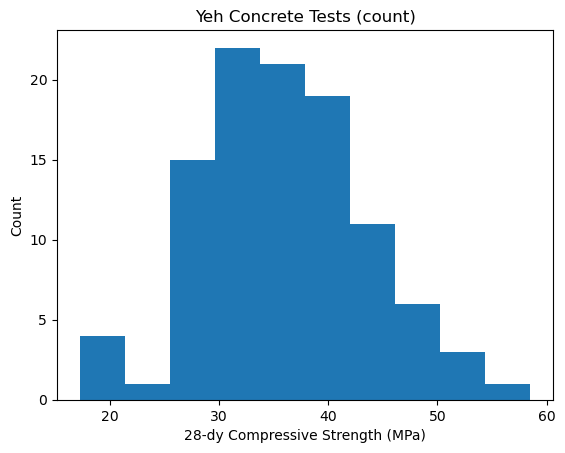

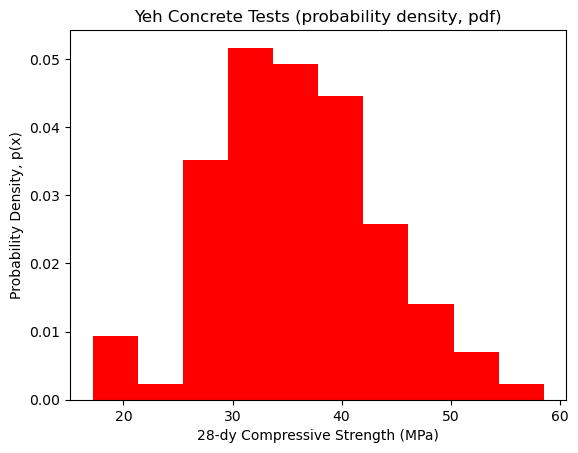

In [8]:
##########################################################
#
# Plotting Histogram (Matplotlib version)
#

plt.hist(data.Compressive_Strength_28dy)
plt.title("Yeh Concrete Tests (count)")
plt.xlabel("28-dy Compressive Strength (MPa)")
plt.ylabel("Count")
plt.show()

#
##########################################################



##########################################################
#
# Plotting Histogram (Matplotlib version as a density plot)
#


plt.hist(data.Compressive_Strength_28dy, 
         density=True,
         color = "r")
plt.title("Yeh Concrete Tests (probability density, pdf)")
plt.xlabel("28-dy Compressive Strength (MPa)")
plt.ylabel("Probability Density, p(x)")
plt.show()


#
##########################################################

There is also an object attached to panda series that makes a histogram with [pandas.DataFrame.plot.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html#pandas.DataFrame.plot.hist) and [pandas.Series.plot.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html).  

Additonally there are specialized functions to do probability density fields similar to R  using [pandas.DataFrame.plot.density](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html) and [pandas.Series.plot.density](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.density.html)

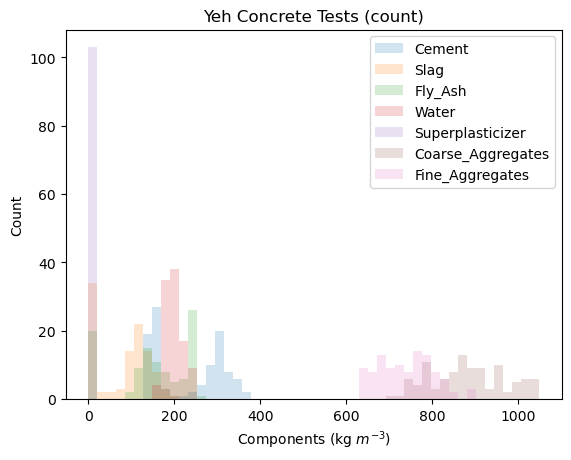

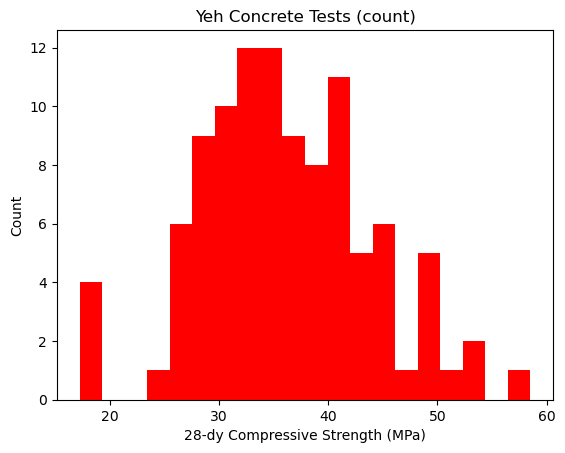

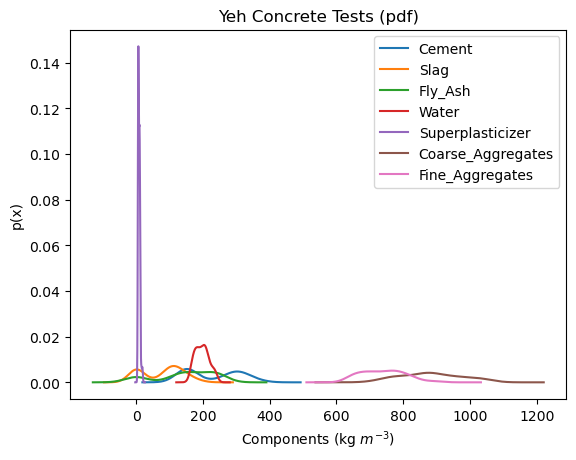

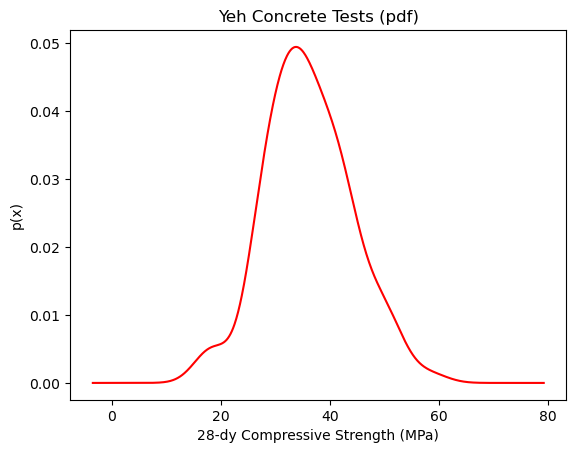

In [9]:
##########################################################
#
# Plotting Histograms (Pandas version)
#

data_indep.plot.hist(bins  = 50,
                     alpha = 0.2)
plt.title("Yeh Concrete Tests (count)")
plt.xlabel("Components (kg $m^{-3}$)")
plt.ylabel("Count")
plt.show()

data.Compressive_Strength_28dy.plot.hist(bins  = 20,
                                         color = "red")
plt.title("Yeh Concrete Tests (count)")
plt.xlabel("28-dy Compressive Strength (MPa)")
plt.ylabel("Count")
plt.show()

#
##########################################################


##########################################################
#
# Plotting Probability Density (Pandas version)
#

data_indep.plot.density()
plt.title("Yeh Concrete Tests (pdf)")
plt.xlabel("Components (kg $m^{-3}$)")
plt.ylabel("p(x)")
plt.show()

data.Compressive_Strength_28dy.plot.density(color = "red")
plt.title("Yeh Concrete Tests (pdf)")
plt.xlabel("28-dy Compressive Strength (MPa)")
plt.ylabel("p(x)")
plt.show()

#
##########################################################

We also can take the latter field and overlay a normal distrubition atop it. (While this is dataset is not a normal distribution, this is mostly for demonstration reasons here and also to set things up later in this exercise when we play rough with confidence intervals.  

To do this we are going to create a simple normal distribution.  Fortunately scipy.stats.* has a resource for that.  (It has resources for a number of probability distributions, including the $t$ distribution).

The normal distribution object in scipy.stats is [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).  One of the resources to that object is "pdf" for the probability distribution, "cdf" for a cumulative distribution from $-\infty$ to a given x, and an inverse cdf function called "ppf" that gets the $x$ value you want for a given $p(x)$.  We'll be using the latter go get the t-statistic for confidence intervals below.

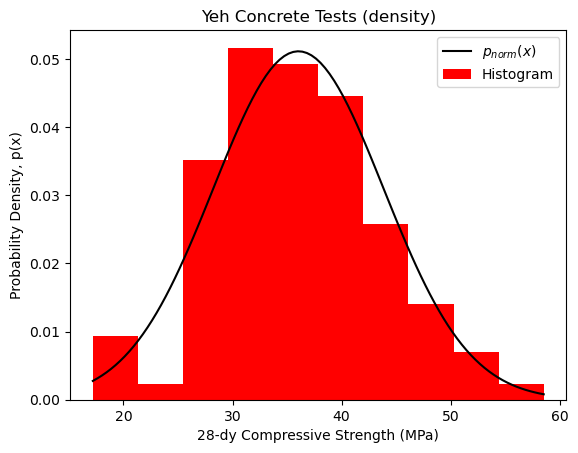

In [10]:
##########################################################
#
# Plotting a density-based histogram with a normal distribution.
#

#
# create a simple x-axis vector 
#
x_vector = np.linspace(np.min(data.Compressive_Strength_28dy),
                       np.max(data.Compressive_Strength_28dy),
                       100)


z_pdf = stats.norm.pdf(x_vector,
                       np.mean(data.Compressive_Strength_28dy),  # mean goes here (loc in the docs)
                       np.std(data.Compressive_Strength_28dy))   # stdev goes here (spread in the docs)

plt.hist(data.Compressive_Strength_28dy, 
         density =True,
         color   = "r")
plt.plot(x_vector,
         z_pdf,
         "k")
plt.legend(["$p_{norm}(x)$",
            "Histogram"])
plt.title("Yeh Concrete Tests (density)")
plt.xlabel("28-dy Compressive Strength (MPa)")
plt.ylabel("Probability Density, p(x)")
plt.show()

#
#########################################################

### Box Whisker Plots

The function [matplotlib.pyplot.boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) will make a boxplot.  

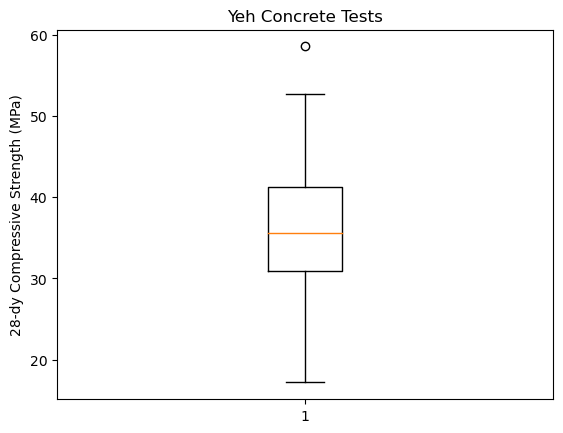

In [11]:
##########################################################
#
# Plotting Box Whisker (single value version)
#

plt.boxplot(data.Compressive_Strength_28dy)
plt.title("Yeh Concrete Tests")
plt.ylabel("28-dy Compressive Strength (MPa)")
plt.show()

#
##########################################################

But we frequency use Boxwhisker plots (and violin plots) to have a downward perspective in our data so we can see multiple fields at once.  Let's try this again using our independant values.

BUT here we have to use another tool for the plotting:  We are working with a pandas data frame.  But luckily there is a operator that hangs off the pandas data object called [pandas.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html).

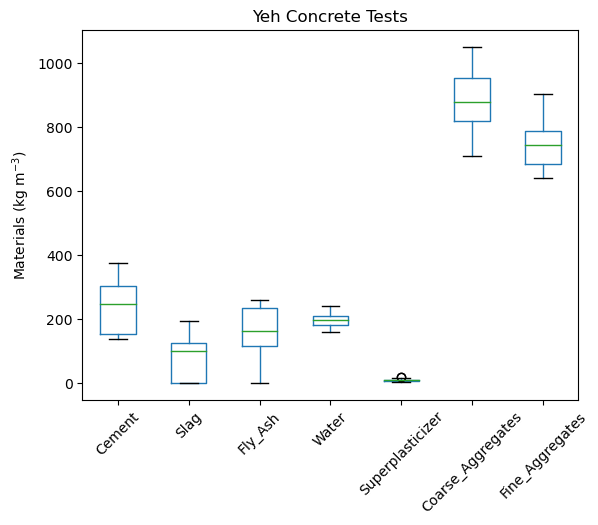

In [12]:
##########################################################
#
# Plotting Box Whisker (Panda's multiple version)
#

data_indep.boxplot(grid = False, # default is to overlay a grid which I don't like
                   rot  = 45)    # you can tilt the axes for long labels
plt.title("Yeh Concrete Tests")
plt.ylabel("Materials (kg m$^{-3}$)")
plt.show()

#
##########################################################

There are a lot of other packages that make spiffy plots such as [Seaborn](https://seaborn.pydata.org/index.html#).  But for now we're keeping things simple.  

## Calculating the Confidence Interval with SciPy.Stats 

How about Confidence Intervals on the mean?  For this we WILL need to dig into the deeper areas of SciPy into their stats libraries.  We'll need the [t-stastic](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t) for our alpha.  This is a little scary so we'll walk it through one step at a time.

Let's also use this as a chance to play with graphics so let's milk this opportunity as muhc as we can.  

### The Student's-T Distribution

Let's fetch the Student's T function. For this we will pull thee pdf from the scipy.stats.t.pdf



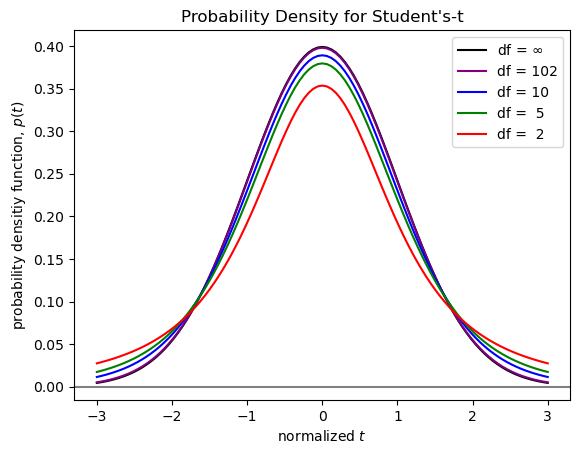

In [13]:
##########################################################
#
# Plotting the PDF for t.
#

t_vector = np.linspace(-3,3,101)

df = data_count - 1

t_pdf_df    = stats.t(df).pdf(t_vector)    # our value
t_pdf_dfInf = stats.t(99999).pdf(t_vector) # "infinity"
t_pdf_df10  = stats.t(10).pdf(t_vector)    # df = 10
t_pdf_df05  = stats.t(5).pdf(t_vector)     # df = 5
t_pdf_df02  = stats.t(2).pdf(t_vector)     # df = 2 





plt.plot(t_vector, t_pdf_dfInf, "k",
         t_vector, t_pdf_df,    "purple",
         t_vector, t_pdf_df10,  "b",
         t_vector, t_pdf_df05,  "g",
         t_vector, t_pdf_df02,  "r")
plt.axhline(y = 0, color = "grey")
plt.legend(["df = $\infty$",
            "df = " + str(df),
            "df = 10",
            "df =  5",
            "df =  2"])
plt.title("Probability Density for Student's-t")
plt.ylabel("probability densitiy function, $p(t)$")
plt.xlabel("normalized $t$")

plt.show()

#
##########################################################

#### ok let's play.... 

This isn't germaine to getting confidence intervals, but who cares, let's play with some plotting tricks.

recall that the t statistic is 

$$t = \frac{\bar{x} - \mu_x}{s_x / \sqrt{n}}$$.

When we look at this plot it would be helpful to see where the t distribution of the expected population mean, $\mu_x$

So arguably we could demonstrate how to overlay our original stats.

With a little Algebra-Fu... we can solve for $\bar{x}$.

$$\bar{x} = \mu_x + t \frac{s_x}{\sqrt{n}}$$ 

So let's overlay that field atop our earlier probability density histogram.

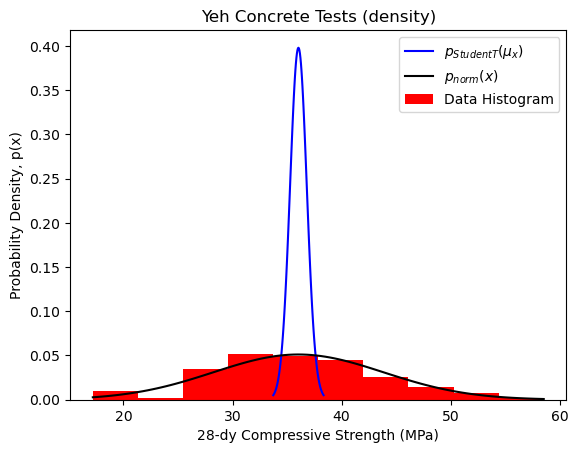

In [24]:
##########################################################
#
# Scaling and displaying our PDF for t to fit x
#

#
# Scaling t to x space
#

x_vector = np.linspace(np.min(data.Compressive_Strength_28dy),
                       np.max(data.Compressive_Strength_28dy),
                       100)

t_vector = np.linspace(-3,3,101)


z_pdf = stats.norm.pdf(x_vector,
                       np.mean(data.Compressive_Strength_28dy),  # mean goes here (loc in the docs)
                       np.std(data.Compressive_Strength_28dy))   # stdev goes here (spread in the docs)


t_vector_on_x = np.mean(data.Compressive_Strength_28dy) + t_vector *  np.std(data.Compressive_Strength_28dy)/np.sqrt(data_count)

#
# Overlaying the the PDF for t over our histogram.  
#  (We also have our normal distribution overlayed atop it)
#
# 
#

plt.hist(data.Compressive_Strength_28dy, 
         density = True,
         color   = "r")
plt.plot(t_vector_on_x, t_pdf_df, "b")
plt.plot(x_vector,
         z_pdf,
         "k")
plt.title("Yeh Concrete Tests (density)")
plt.xlabel("28-dy Compressive Strength (MPa)")
plt.ylabel("Probability Density, p(x)")
plt.legend(["$p_{StudentT}(\mu_x)$",
            "$p_{norm}(x)$",
            "Data Histogram"])
plt.show()

#
##########################################################

So if we look at this plot, we can clearly see that the confidence intervals on the mean of our distribution are markedly tigher around the mean than the normal distribution for x.

Recall that to get the two-tail area under the curve that enclosing 95% of the data, we target the right-side end of the enclosed area so for a 95% confidence interval we can just grab the cumulative distribution of our t distirbution and get the value where it's at $1-\alpha/2$ which for us is 97.5%.

In [15]:
##########################################################
#
# Fetching our 95% confidence T-Statistic (inverse cdf for 0.975)
#

#
#  Degrees of freedom (n-1)

df = pd.Series.count(data.Compressive_Strength_28dy) - 1

#
#  Our Alpha Collection

confidence_interval  = 0.95
alpha                = 1 - confidence_interval
one_tail_probability = 1 - alpha/2

#
#  Our Inverse of T for a cdf prob of 1-alpha/2


tcdf_inv = stats.t(df).ppf(one_tail_probability)

print("Our t-statistic is ",tcdf_inv)
print()

#
# And finally we can scale our t for our dataset
#

confidence_interval_95 = tcdf_inv * data_std.Compressive_Strength_28dy / np.sqrt(data_count)

confidence_intervals = np.array((data_means.Compressive_Strength_28dy - confidence_interval_95,
                                 data_means.Compressive_Strength_28dy + confidence_interval_95))

print("t s / sqrt(n) = ",         confidence_interval_95)
print()
print("confidence limit range: ", confidence_intervals)



#
##########################################################

Our t-statistic is  1.98349525849594

t s / sqrt(n) =  1.5319008537401502

confidence limit range:  [34.50751662 37.57131833]


## Linear Regression

Now let's do a linear regression on the Compressional Strength vs Cement Amount.

This is much more complicated a process than working in R or Mathcad.  

The best tool here is a library called [scikit-learn](https://scikit-learn.org/stable/).  This package is outside of the normal python ecosystem that people expect but is widely used. They also [rightfully] request to be cited when it's used so...


Pedregosa, F. et al., 2011: Scikit-learn: Machine Learning in Python, *Journal of Machine Learning Research*, **12**, 2825-2830.


Here we are going to use scikit-learn's [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) resource to manage the regression.  Getting scores are done using a different area of sklearn, [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

In [16]:
##########################################################
#
# Linear Regression with scikit-learn
#
# Here we will use the machine learning resource with scikit-learn
#

# To start we need a very simple pair of arrays for our x and y data

# the double [[]]'s will take what would have been a horizontal vector 
#   into a vertical one

x = data[['Cement']]
y = data[['Compressive_Strength_28dy']]

#
# for referecne let's make a new degree of freedom value
#

df = data_count - 1 - 1

# We now need to create an "empty" linear regression object
#  this object will contain most of the tools we will
#  need to create the linear regression.

regr = sklm.LinearRegression()

# now we use the fit our observalues of x and y together.

regr.fit(x, # your X
         y) # your Y

# calculate the fitted y values to your input values

Y_pred = regr.predict(x)  # make predictions

#
##########################################################

Metrics for Linear Regression

There are a set of tools in scikit-learn and honestly I really don't like them.  The only one that has helped me is the r_squared function.  I'll include a couple examples of their usage here, but  I prefer just using the basic equations.


* Sum of the Squared Totals: $SST = \sum{\left(  y - \bar{y}  \right)^2}$

* Sum of the Squared Residuals: $SSR = \sum{\left[  y - \hat{y}\left(\vec{x}\right)  \right]^2}$

* Standard Error of the Estimate:  $s_{yx} = \sqrt{\frac{SSR}{n-p-1}}$

* Root Mean Square Error: $RMSE = \sqrt{MSE} = \sqrt{\frac{SSR}{n}}$

* Coef of Determination: $r^2 = \frac{SSR-SST}{0-SST} = \frac{SST-SSR}{SST} =  1 - \frac{SSR}{SST}$

* Adjusted Coef of Determination (for multivarate regression): $r_{adj}^2 = 1 - \frac{SSR / (n-p-1)}{SST / (n-1)} $

* CI Range for $\hat{y}(x)$: $\hat{y}(x) \pm t_{\alpha/2,df} s_{yx} \sqrt{ \frac{1}{n} + \frac{ \left( x-\bar{x} \right)^2 }{\sum{\left( x-\bar{x} \right)^2}} }$





In [17]:
##########################################################
#
# Linear Regression Metrics with scikit-learn
#

#
# Let's first get those variables into scalar form
#   from a dataframe into a single value 
#

SST          = np.sum( (y - np.mean(y))**2 ).squeeze()
SSR          = np.sum( (y -     Y_pred)**2 ).squeeze()

Skill        = (SSR - SST) / ( 0 - SST)

s_yx         = np.sqrt( SSR / (df) )

tcdf_inv_reg = tcdf_inv = stats.t(df).ppf(one_tail_probability)



# print the summary of results.
print("    Num of Obs: ", data_count)
print("Deg of Freedom: ", df)
print("           SST: ", SST)
print("           SSR: ", SSR)
print("           MSE: ",         skl.metrics.mean_squared_error(y,Y_pred)  )
print("          RMSE: ", np.sqrt(skl.metrics.mean_squared_error(y,Y_pred)) )
print("           sxy: ", s_yx)
print("     R-squared: ", skl.metrics.r2_score(y, Y_pred))
print("         Skill: ", Skill)
print("   t_statistic: ", tcdf_inv_reg)

#
##########################################################

    Num of Obs:  103
Deg of Freedom:  101
           SST:  6266.663565048543
           SSR:  5021.661699578714
           MSE:  48.75399708328849
          RMSE:  6.982406253097029
           sxy:  7.051200094175891
     R-squared:  0.19867060877715792
         Skill:  0.19867060877715792
   t_statistic:  1.983731002885281


/Users/wjc/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


/Users/wjc/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/wjc/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/wjc/miniconda3/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/wjc/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar me

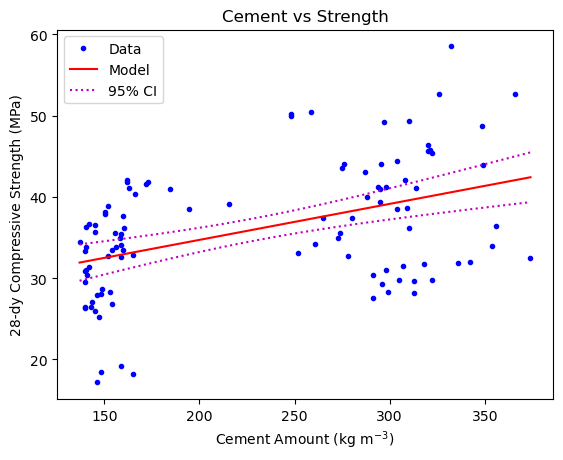

In [18]:
##########################################################
#
# Plotting Things Out
#
# We're doing this one element at a 
# Make a sorted range for the x-axis

x_vector = np.linspace(np.min(x),   # low val
                       np.max(x),   # high val
                       100)         # points

Y_of_x_vector = regr.predict(x_vector) # your 

#
# Create two intermediate steps for calculating
#   CI for linear regression
# 

x_xm_2 = ( x_vector - np.mean(x).squeeze() )**2 



ci_reg = tcdf_inv_reg * s_yx * np.sqrt( 1/data_count + x_xm_2 / np.sum(x_xm_2))  

# Plot it all... 

plt.plot(       x,                    y, ".b") # the original data
plt.plot(x_vector, Y_of_x_vector,        "-r") # regression line
plt.plot(x_vector, Y_of_x_vector+ci_reg, ":m") # top CI
plt.plot(x_vector, Y_of_x_vector-ci_reg, ":m") # bottom CI

plt.title('Cement vs Strength')
plt.xlabel('Cement Amount (kg m$^{-3}$)') 
plt.ylabel('28-dy Compressive Strength (MPa)')
plt.legend(["Data",
            "Model",
            "95% CI"])

plt.show()

#
##########################################################

## Multivariate Regression

Now let's try a multivariate regression using all of our independant variables that we pulled from above.

The Linear Regression method from above can be applied here.

In [19]:
##########################################################
#
# For a multivariate regression we will do the same 
#   thing as above 
#

#    Get the Y value

y = data[['Compressive_Strength_28dy']]

#    For the X vector we are just using earlier indep. data
#      dataframe (data_indep)  

X = data_indep

#
#  Degrees of freedom (n-p)  (p includes dep and indep fields)
#

df = data_count - len(data_indep.columns) - 1

# We now need to create another empty linear regression 
#  object this object will contain most of the tools we 
#  will need to create the linear regression.

regrM = sklm.LinearRegression()

# now we use the fit our observalues of x and y together.

regrM.fit(X, # your X
          y) # your Y

# calculate the fitted y values

Ym_pred = regrM.predict(X)  # make predictions

#
##########################################################

Calculating the regression metrics

In [20]:
##########################################################
#
# Multivariate Linear Regression Metrics 
#

#
# Get the variables into scalar form
#   from a dataframe into a single value 
#

SST          = np.sum( (y - np.mean(y))**2 ).squeeze()
SSR          = np.sum( (y -    Ym_pred)**2 ).squeeze()

Skill        = (SSR - SST) / ( 0 - SST)

Adjusted_R   = 1 - (SSR/(df)) / (SST/(data_count-1-1))

s_yx         = np.sqrt( SSR / (df) )




# print the summary of results.
print("    Num of Obs: ", data_count)
print("Deg of Freedom: ", df)
print("           SST: ", SST)
print("           SSR: ", SSR)
print("           MSE: ",         skl.metrics.mean_squared_error(y,Ym_pred)  )
print("          RMSE: ", np.sqrt(skl.metrics.mean_squared_error(y,Ym_pred)) )
print("           sxy: ", s_yx)
print(" Adj.R-squared: ", Adjusted_R)
print("         Skill: ", Skill)

#
##########################################################

    Num of Obs:  103
Deg of Freedom:  95
           SST:  6266.663565048543
           SSR:  646.4839918618696
           MSE:  6.276543610309414
          RMSE:  2.505303097493278
           sxy:  2.608657633952293
 Adj.R-squared:  0.8903220904338414
         Skill:  0.8968376098140092


/Users/wjc/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Now let's plot this one out.

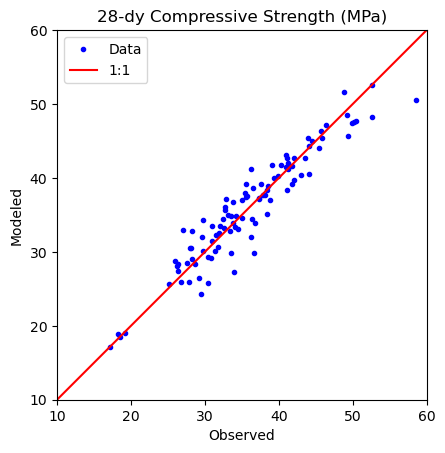

In [21]:
##########################################################
#
# Plotting Things Out
#
# We're doing this one element at a time
#

# make an high-y and low-y for our 1:1

hi_lo_y = np.array((  0, # low val
                    100)) # high val

# Plot the data as blue dots

plt.plot(y,       Ym_pred, ".b") # plot points
plt.plot(hi_lo_y, hi_lo_y, "-r") # plot 1:1 line
plt.title('28-dy Compressive Strength (MPa)')
plt.xlabel('Observed') 
plt.ylabel('Modeled')
plt.xlim(10,60)
plt.ylim(10,60)
plt.legend(["Data",
            "1:1"]) 
plt.gca().set_aspect('equal', 
                     adjustable='box') # this makes things square
plt.show()

#
##########################################################

## Version Information

In [22]:
################################################################
#
# Loading Version Information
#

%load_ext version_information

%version_information version_information, numpy, matplotlib, pandas, xlrd, scipy, sklearn

#
################################################################

Software,Version
Python,3.10.8 64bit [Clang 14.0.6 ]
IPython,8.8.0
OS,macOS 13.2 arm64 arm 64bit
version_information,1.0.4
numpy,1.23.5
matplotlib,3.6.2
pandas,1.5.2
xlrd,2.0.1
scipy,1.10.0
sklearn,1.2.0
